<a href="https://colab.research.google.com/github/MANSI-UPRETI/ds_mansi_upreti/blob/main/notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
from google.colab import files
uploaded = files.upload()

Saving historical_data.csv to historical_data.csv
Saving fear_greed_index.csv to fear_greed_index.csv


In [5]:
import pandas as pd
trader_data = pd.read_csv("historical_data.csv")
fear_greed = pd.read_csv("fear_greed_index.csv")


In [6]:
trader_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [7]:
fear_greed.head()


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [8]:
trader_data.info()
fear_greed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [11]:
trader_data['Timestamp IST'] = pd.to_datetime(trader_data['Timestamp IST'], format="%d-%m-%Y %H:%M")
fear_greed['date'] = pd.to_datetime(fear_greed['date'])

In [12]:
trader_data['date'] = trader_data['Timestamp IST'].dt.date
daily_trading_volume = trader_data.groupby('date')['Size USD'].sum().reset_index()


In [14]:
daily_trading_volume['date'] = pd.to_datetime(daily_trading_volume['date'])
merged_data = pd.merge(daily_trading_volume, fear_greed[['date', 'value', 'classification']], on='date', how='inner')


In [15]:
merged_data.head(10)


,date,Size USD,value,classification
0,2023-05-01,477.00,63,Greed
1,2023-12-05,50005.83,75,Extreme Greed
2,2023-12-14,113203.35,72,Greed
3,2023-12-15,10609.95,70,Greed
4,2023-12-16,15348.77,67,Greed
5,2023-12-17,116278.02,73,Greed
6,2023-12-18,31164.18,65,Greed
7,2023-12-19,91602.41,73,Greed
8,2023-12-20,141636.79,74,Greed
9,2023-12-21,125233.97,70,Greed


In [16]:
!pip install matplotlib seaborn


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
trader_data['date'] = trader_data['Timestamp IST'].dt.date
fear_greed['date'] = fear_greed['date'].dt.date

merged_df = pd.merge(trader_data, fear_greed, on='date', how='left')


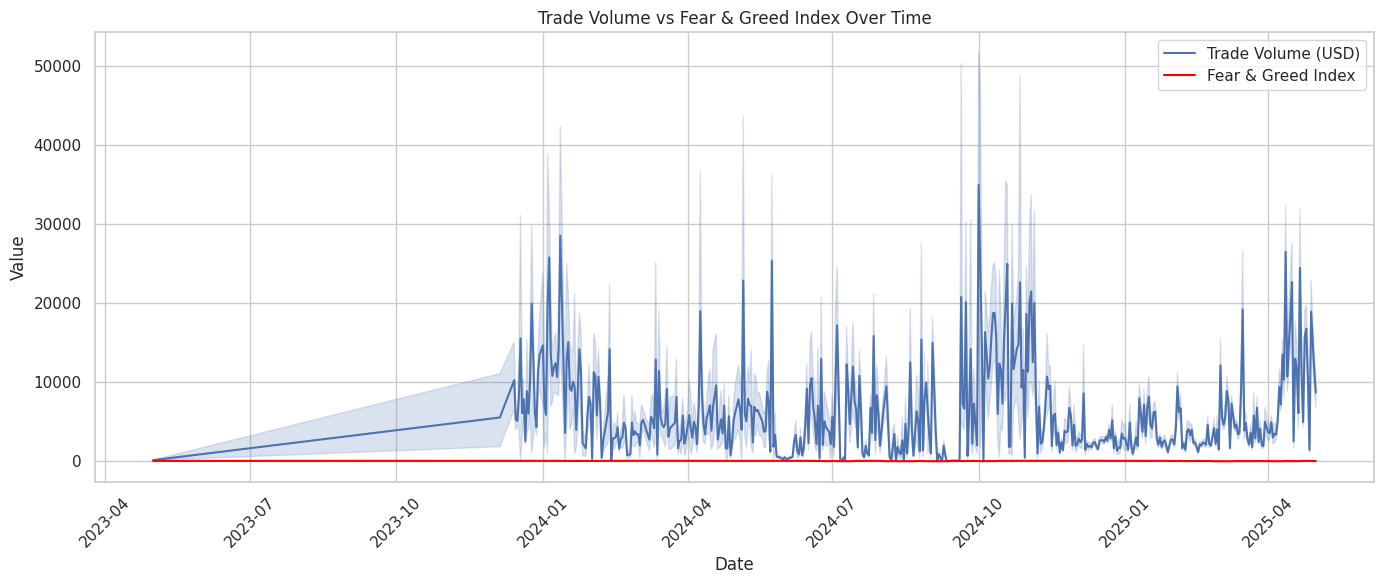

In [19]:
plt.figure(figsize=(14, 6))
sns.set(style='whitegrid')

sns.lineplot(data=merged_df, x='date', y='Size USD', label='Trade Volume (USD)')
sns.lineplot(data=merged_df, x='date', y='value', label='Fear & Greed Index', color='red')

plt.title('Trade Volume vs Fear & Greed Index Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


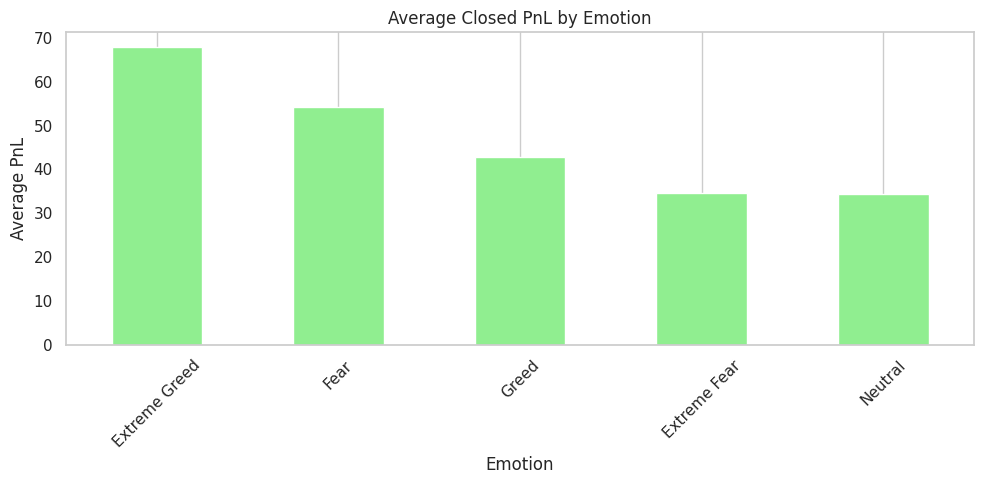

In [20]:
avg_pnl = merged_df.groupby('classification')['Closed PnL'].mean().sort_values(ascending=False)

avg_pnl.plot(kind='bar', color='lightgreen', figsize=(10,5))
plt.title("Average Closed PnL by Emotion")
plt.xlabel("Emotion")
plt.ylabel("Average PnL")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


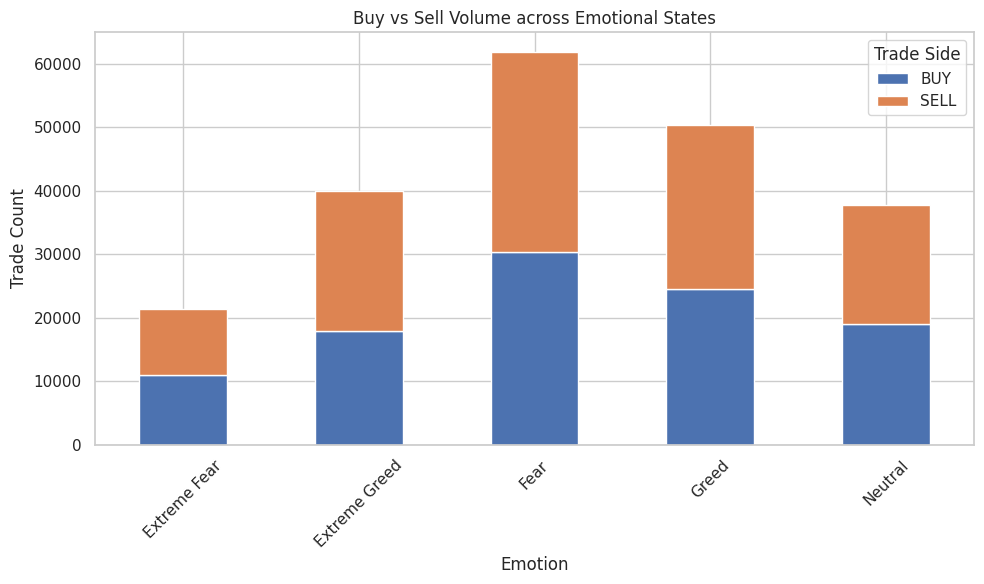

In [21]:
buy_sell_df = merged_df.groupby(['classification', 'Side']).size().unstack().fillna(0)

buy_sell_df.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Buy vs Sell Volume across Emotional States")
plt.xlabel("Emotion")
plt.ylabel("Trade Count")
plt.xticks(rotation=45)
plt.legend(title="Trade Side")
plt.tight_layout()
plt.show()


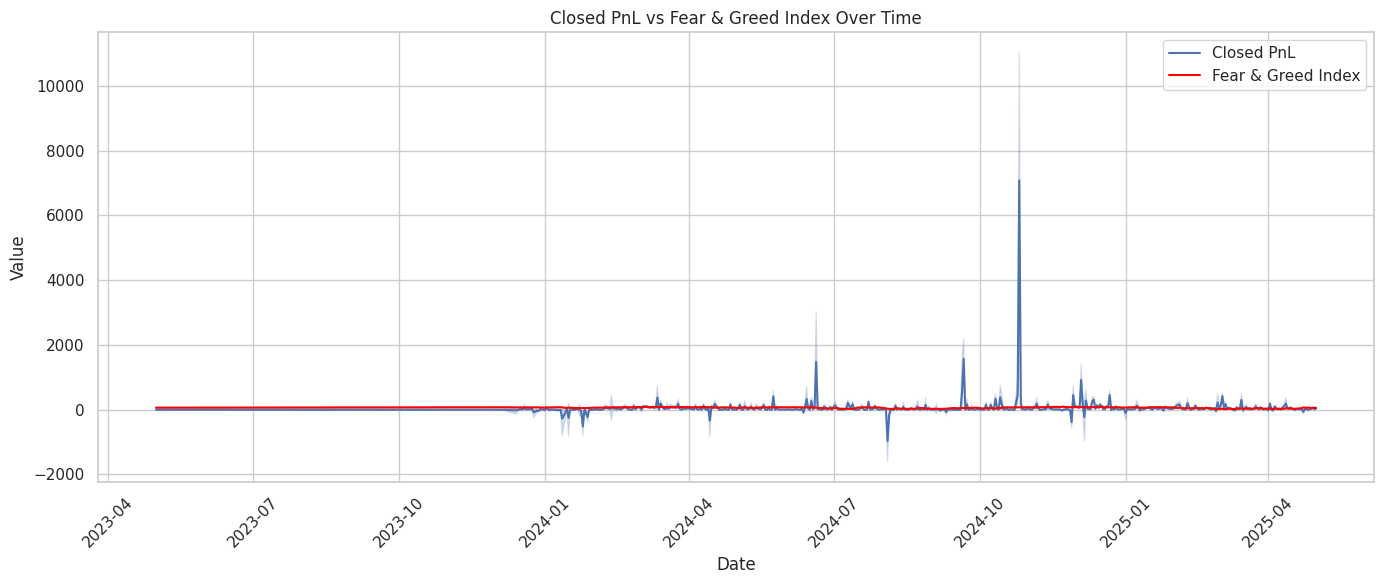

In [22]:
plt.figure(figsize=(14,6))
sns.lineplot(x='date', y='Closed PnL', data=merged_df, label='Closed PnL')
sns.lineplot(x='date', y='value', data=merged_df, label='Fear & Greed Index', color='red')
plt.title('Closed PnL vs Fear & Greed Index Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

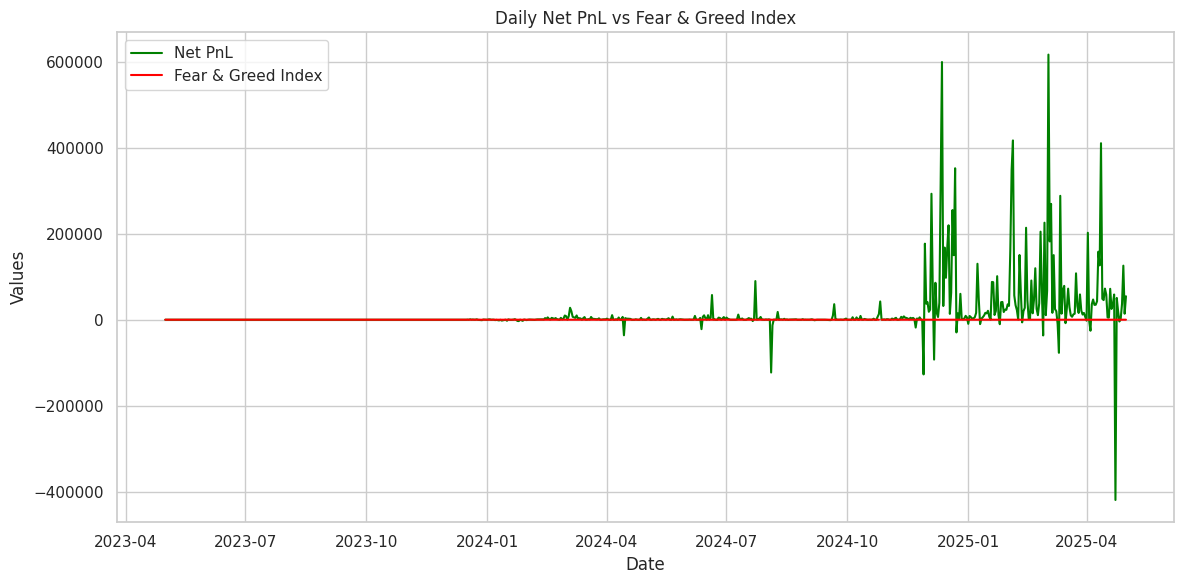

In [23]:
daily_pnl = merged_df.groupby('date')['Closed PnL'].sum()
fear_index = merged_df.groupby('date')['value'].first()

plt.figure(figsize=(12,6))
plt.plot(daily_pnl.index, daily_pnl.values, label="Net PnL", color='green')
plt.plot(fear_index.index, fear_index.values, label="Fear & Greed Index", color='red')
plt.title("Daily Net PnL vs Fear & Greed Index")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

